## imports ##

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
#remove warnings
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/Users/gilbenor/Documents/code_projects/msc/counting_research_algorithms/fifty_one/measurements/results/analysis/error_flags_analysis_carapace_all_mean.csv')
df.head()

,Label,PrawnID,Pond_Type,mean_length,std_length,Length_fov(mm),mean_pixels,pred_Distance_pixels,Length_ground_truth_annotation_pixels,mean_scale,pred_scale
0,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_0,circle_female,41.918000,3.100499,37.753556,239.626009,200.202888,187.683244,57.135000,53.028883
1,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_1,circle_female,26.698000,2.256880,26.810201,152.522831,142.683627,128.062485,57.135000,53.219901
2,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_2,circle_female,46.299667,5.608803,39.032134,264.494446,204.018342,233.452351,57.135000,52.269328
3,carapace:undistorted_GX010067_33_625.jpg_gamma,Prawn_3,circle_female,24.278667,0.676281,22.197955,138.686912,115.751815,145.086181,57.135000,52.145260
4,carapace:undistorted_GX010068_26_666.jpg_gamma,Prawn_0,circle_female,33.843333,3.193569,28.185298,183.912863,150.119403,162.634560,54.126333,53.261599


## Error decompoition ##

### cancellation magnitude ###


--- Error Analysis for Pond Type: circle_female ---
   - Number of points in df_pond: 95
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 67.37%
   - Number of points with partial cancellation: 64

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 4.46
   - Standard deviation of cancellation magnitude: 3.21
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 14.00%
   - Standard deviation of relative cancellation magnitude: 10.07%

----------------------------------------

Correlation between actual error and cancellation: -0.11223874525819678

3. Dominance of Error Types:
   - Number of points where Scale Error is dominant: 28
   - Percentage of points where Scale Error is dominant: 29.47%
   - Number of points where Pixel Error is dominant: 67
   - Percentage of points where Pixel Error is dominant: 70.53%


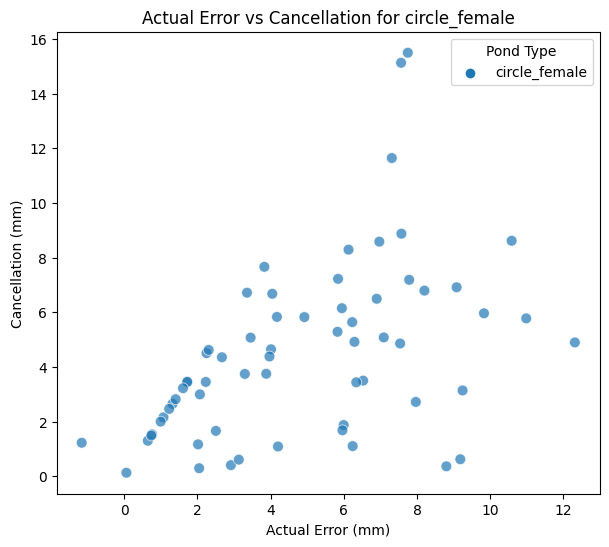


--- Error Analysis for Pond Type: circle_male ---
   - Number of points in df_pond: 13
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 100.00%
   - Number of points with partial cancellation: 13

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 6.37
   - Standard deviation of cancellation magnitude: 1.99
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 28.50%
   - Standard deviation of relative cancellation magnitude: 8.91%

----------------------------------------

Correlation between actual error and cancellation: -0.426111911631618

3. Dominance of Error Types:
   - Number of points where Scale Error is dominant: 4
   - Percentage of points where Scale Error is dominant: 30.77%
   - Number of points where Pixel Error is dominant: 9
   - Percentage of points where Pixel Error is dominant: 69.23%


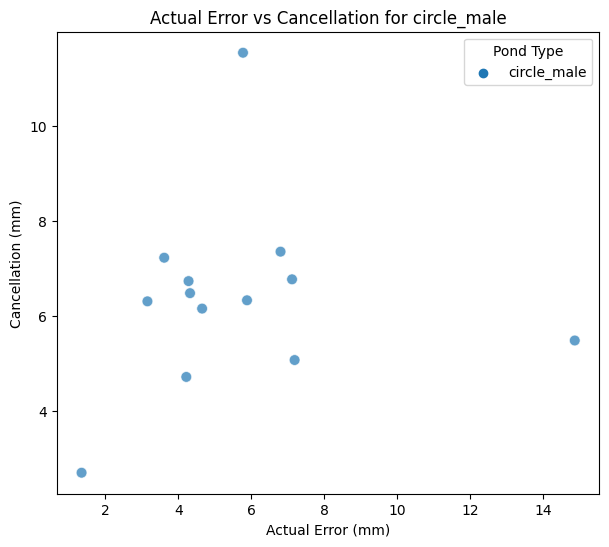


--- Error Analysis for Pond Type: square ---
   - Number of points in df_pond: 32
1. Partial Cancellation of Errors:
   - Percentage of points with partial cancellation: 40.62%
   - Number of points with partial cancellation: 13

2. Cancellation Magnitude:
   - Mean cancellation magnitude: 4.59
   - Standard deviation of cancellation magnitude: 2.94
   - Mean percentage of cancellation magnitude relative to Length_fov(mm): 15.63%
   - Standard deviation of relative cancellation magnitude: 10.02%

----------------------------------------

Correlation between actual error and cancellation: 0.25475539906390093

3. Dominance of Error Types:
   - Number of points where Scale Error is dominant: 2
   - Percentage of points where Scale Error is dominant: 6.25%
   - Number of points where Pixel Error is dominant: 30
   - Percentage of points where Pixel Error is dominant: 93.75%


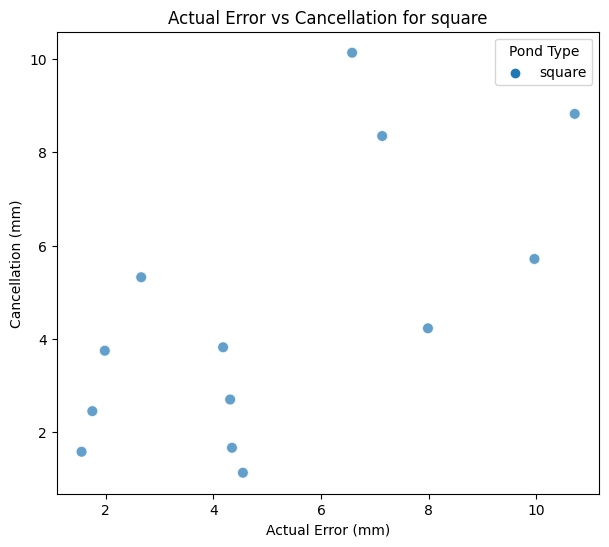

In [4]:
for pond_type in df['Pond_Type'].unique():
    df_pond = df[df['Pond_Type'] == pond_type]
    #reset index
    df_pond = df_pond.reset_index(drop=True)
    df_pond['pixel_error_mm'] = (df_pond['mean_pixels'] - df_pond['pred_Distance_pixels']) * (1/df_pond['mean_scale']) * 10
    df_pond['scale_error_mm'] = df_pond['mean_pixels'] * (1/df_pond['mean_scale'] - 1/df_pond['pred_scale']) * 10
    partial_cancel_mask_all = (df_pond['pixel_error_mm'] * df_pond['scale_error_mm'] < 0)
    percent_partial_cancel_all = 100 * partial_cancel_mask_all.sum() / len(df_pond) if len(df_pond) > 0 else 0
    print("\n--- Error Analysis for Pond Type: {} ---".format(pond_type))
    #print number of points in df_pond
    print("   - Number of points in df_pond: {}".format(len(df_pond)))
    print("1. Partial Cancellation of Errors:")
    print("   - Percentage of points with partial cancellation: {:.2f}%".format(percent_partial_cancel_all))
    num_partial_cancel_all = partial_cancel_mask_all.sum()
    print("   - Number of points with partial cancellation: {}".format(num_partial_cancel_all))
    
    uncancelled_error = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm']) + abs(df_pond[partial_cancel_mask_all]['scale_error_mm'])
    actual_total_error = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm'] + df_pond[partial_cancel_mask_all]['scale_error_mm'])
    cancellation_magnitude = uncancelled_error - actual_total_error
    
    print("\n2. Cancellation Magnitude:")
    print("   - Mean cancellation magnitude: {:.2f}".format(cancellation_magnitude.mean()))
    print("   - Standard deviation of cancellation magnitude: {:.2f}".format(cancellation_magnitude.std()))
    print("   - Mean percentage of cancellation magnitude relative to Length_fov(mm): {:.2f}%".format(
        cancellation_magnitude.mean() / df_pond["Length_fov(mm)"].abs().mean() * 100))
    print("   - Standard deviation of relative cancellation magnitude: {:.2f}%".format(cancellation_magnitude.std() / df_pond["Length_fov(mm)"].abs().mean() * 100))
  
    print("\n----------------------------------------\n")

    df_pond['actual_error_mm'] = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm'] + df_pond[partial_cancel_mask_all]['scale_error_mm'])
    df_pond['cancellation_mm'] = abs(df_pond[partial_cancel_mask_all]['pixel_error_mm']) + abs(df_pond[partial_cancel_mask_all]['scale_error_mm']) - df_pond[partial_cancel_mask_all]['actual_error_mm']

    #correlation between actual error and cancellation
    print(f"Correlation between actual error and cancellation: {df_pond['actual_error_mm'].corr(df_pond['cancellation_mm'])}")


    # Calculate the dominance of scale and pixel errors
    df_pond['dominant_error'] = np.where(
        abs(df_pond['scale_error_mm']) > abs(df_pond['pixel_error_mm']),
        'Scale Error',
        'Pixel Error'
    )

    # Count the number of occurrences for each dominant error type
    dominant_counts = df_pond['dominant_error'].value_counts()

    # Calculate the percentage of each dominant error type
    dominant_percentages = df_pond['dominant_error'].value_counts(normalize=True) * 100

    # Print the results
    print("\n3. Dominance of Error Types:")
    print("   - Number of points where Scale Error is dominant: {}".format(dominant_counts.get('Scale Error', 0)))
    print("   - Percentage of points where Scale Error is dominant: {:.2f}%".format(dominant_percentages.get('Scale Error', 0)))
    print("   - Number of points where Pixel Error is dominant: {}".format(dominant_counts.get('Pixel Error', 0)))
    print("   - Percentage of points where Pixel Error is dominant: {:.2f}%".format(dominant_percentages.get('Pixel Error', 0)))




    #scatter plot of actual error vs cancellation
    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=df_pond, x='pixel_error_mm', y='cancellation_mm',
                hue='Pond_Type', alpha=.7, s=60)
    plt.xlabel('Actual Error (mm)')
    plt.ylabel('Cancellation (mm)')
    plt.title(f'Actual Error vs Cancellation for {pond_type}')
    plt.legend(title='Pond Type')
    plt.show()

    #error componenets stack bar plot  
    # Create a new figure for the error components analysis
    fig = go.Figure()

    # Add a bar trace for Pixel Error
    fig.add_trace(go.Bar(
        name='Pixel Error',
        x=df_pond.index,  # Use the index of df_pond for x-axis
        y=df_pond['pixel_error_mm'],  # Use pixel_error_mm from df_pond
        marker_color='#1f77b4',  # Set the color for Pixel Error bars
        hovertemplate="Image: %{customdata[0]}<br>" +
                      "Prawn ID: %{customdata[1]}<br>" +
                      "Mean Length: %{customdata[2]:.1f}mm<br>" +
                      "Model Length: %{customdata[3]:.1f}mm<br>" +
                      "Pixel Error: %{y:.1f}mm<br>" +
                      "Impact: %{customdata[4]:.1f}%<extra></extra>",
        customdata=df_pond[['Label', 'PrawnID', 'mean_length', 'Length_fov(mm)']].values  # Use df_pond for custom data
    ))

    # Add a bar trace for Scale Error
    fig.add_trace(go.Bar(
        name='Scale Error',
        x=df_pond.index,  # Use the index of df_pond for x-axis
        y=df_pond['scale_error_mm'],  # Use scale_error_mm from df_pond
        marker_color='#ff7f0e',  # Set the color for Scale Error bars
        hovertemplate="Image: %{customdata[0]}<br>" +
                      "Prawn ID: %{customdata[1]}<br>" +
                      "Mean Length: %{customdata[2]:.1f}mm<br>" +
                      "Model Length: %{customdata[3]:.1f}mm<br>" +
                      "Scale Error: %{y:.1f}mm<br>" +
                      "Impact: %{customdata[4]:.1f}%<extra></extra>",
        customdata=df_pond[['Label', 'PrawnID', 'mean_length', 'Length_fov(mm)']].values  # Use df_pond for custom data
    ))

    # Update the layout of the figure
    fig.update_layout(
        barmode='relative',  # Display bars side by side
        title=f'Error Components Analysis - {pond_type}',  # Dynamic title based on pond type
        xaxis_title='Measurement Index',  # X-axis label
        yaxis_title='Error (mm)',  # Y-axis label
        showlegend=True,  # Display legend
        width=1000,  # Set the width of the figure
        height=600  # Set the height of the figure
    )
    #show the plot
    fig.show()
    #save the plot


### scale error ###


--- Scale Error Analysis for Pond Type: circle_female ---
   - Mean of Scale Error: 2.14 mm
   - Standard Deviation of Scale Error: 1.58 mm
   - Mean of Scale Error Relative to Length: 6.83%
   - Standard Deviation of Scale Error Relative to Length: 5.05%

----------------------------------------

Percentage of scale error points that share the same image (Label) with at least one other scale error point (all samples): 13.6842%
Number of scale error points that share the same image (Label) with at least one other scale error point (all samples): 13
Total number of images with shared scale error: 10

----------------------------------------



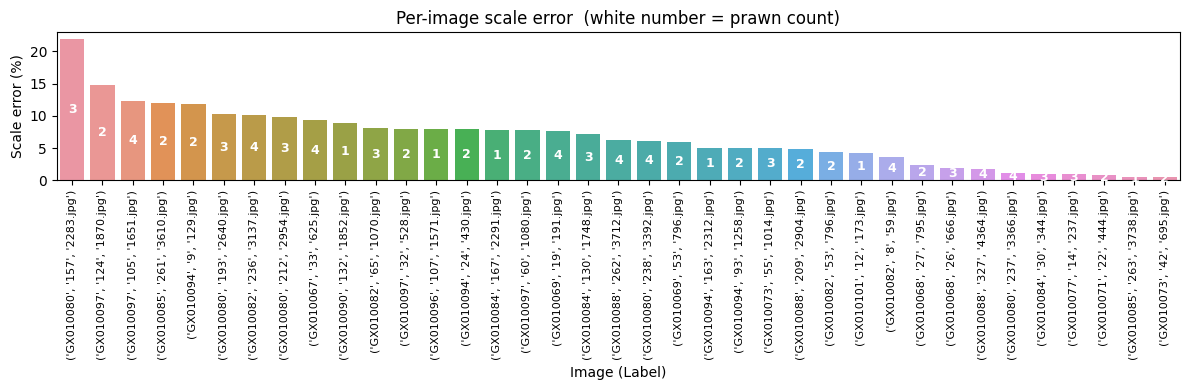


--- Scale Error Analysis for Pond Type: circle_male ---
   - Mean of Scale Error: 3.77 mm
   - Standard Deviation of Scale Error: 1.29 mm
   - Mean of Scale Error Relative to Length: 19.99%
   - Standard Deviation of Scale Error Relative to Length: 6.83%

----------------------------------------

Percentage of scale error points that share the same image (Label) with at least one other scale error point (all samples): 84.6154%
Number of scale error points that share the same image (Label) with at least one other scale error point (all samples): 11
Total number of images with shared scale error: 5

----------------------------------------



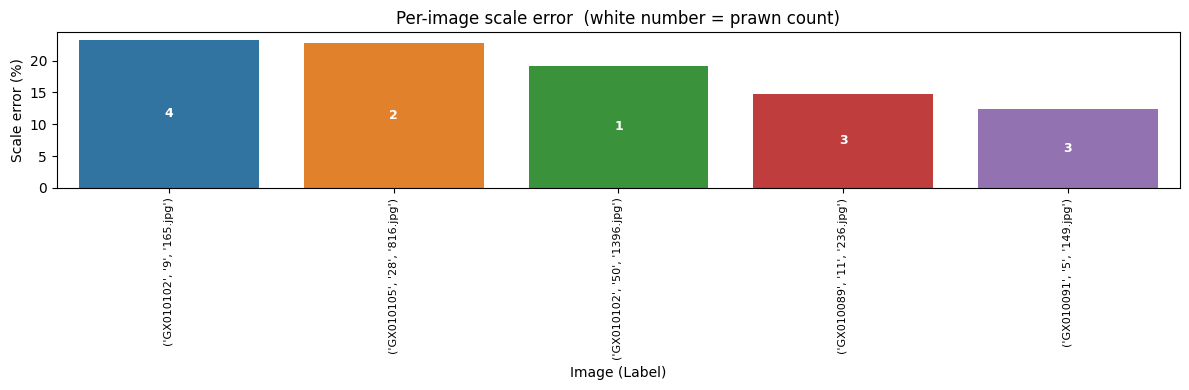


--- Scale Error Analysis for Pond Type: square ---
   - Mean of Scale Error: 2.96 mm
   - Standard Deviation of Scale Error: 2.10 mm
   - Mean of Scale Error Relative to Length: 10.30%
   - Standard Deviation of Scale Error Relative to Length: 7.31%

----------------------------------------

Percentage of scale error points that share the same image (Label) with at least one other scale error point (all samples): 12.5000%
Number of scale error points that share the same image (Label) with at least one other scale error point (all samples): 4
Total number of images with shared scale error: 12

----------------------------------------



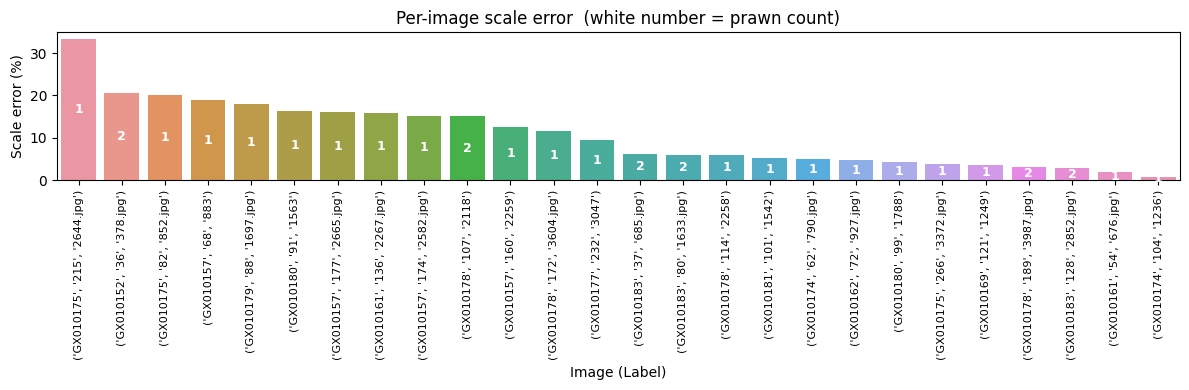

In [5]:
for pond_type in df['Pond_Type'].unique():
    df_pond = df[df['Pond_Type'] == pond_type]
    df_pond['pixel_error_mm'] = (df_pond['mean_pixels'] - df_pond['pred_Distance_pixels']) * (1/df_pond['mean_scale']) * 10
    df_pond['scale_error_mm'] = df_pond['mean_pixels'] * (1/df_pond['mean_scale'] - 1/df_pond['pred_scale']) * 10

    # Magnitude of scale error
    df_pond['scale_error_mm'] = abs(df_pond['scale_error_mm'])
    
    # Mean and standard deviation of scale error
    mean_scale_error = df_pond['scale_error_mm'].mean()
    std_scale_error = df_pond['scale_error_mm'].std()
    print(f"\n--- Scale Error Analysis for Pond Type: {pond_type} ---")
    print(f"   - Mean of Scale Error: {mean_scale_error:.2f} mm")
    print(f"   - Standard Deviation of Scale Error: {std_scale_error:.2f} mm")
    
    # Mean and standard deviation relative to scale error
    mean_relative_scale_error = (mean_scale_error / df_pond['Length_fov(mm)']).abs().mean()*100
    std_relative_scale_error = (std_scale_error / df_pond['Length_fov(mm)']).abs().mean()*100   
    print(f"   - Mean of Scale Error Relative to Length: {mean_relative_scale_error:.2f}%")
    print(f"   - Standard Deviation of Scale Error Relative to Length: {std_relative_scale_error:.2f}%")
    print("\n----------------------------------------\n")


    #shared scale error in the same image
    df_pond['scale_error_percentage'] = (df_pond['scale_error_mm'] / df_pond['Length_fov(mm)']) * 100
    shared_label_count = df_pond[df_pond['scale_error_percentage'] > 10]['Label'].duplicated(keep=False).sum()
    percent_shared = 100 * shared_label_count / len(df_pond)
    print(f"Percentage of scale error points that share the same image (Label) with at least one other scale error point (all samples): {percent_shared:.4f}%")
    print(f"Number of scale error points that share the same image (Label) with at least one other scale error point (all samples): {shared_label_count}")
    print(f"Total number of images with shared scale error: {df_pond[df_pond['scale_error_percentage'] > 10]['Label'].nunique()}")
    print("\n----------------------------------------\n")


    # ---------- GROUP BY IMAGE ----------------------------------------------
    df_img = (df_pond
            .groupby(
                df_pond['Label'].apply(
                    lambda x: tuple(x.split('undistorted_')[-1].split('_')[0:3])
                )
            )
            .agg(scale_err_perc = ('scale_error_percentage', 'mean'),
                prawn_count    = ('scale_error_percentage', 'size'))   # <-- NEW
            .reset_index())

    df_img = df_img.sort_values('scale_err_perc', ascending=False).reset_index(drop=True)

    # ---------- PLOT ---------------------------------------------------------
    plt.figure(figsize=(12, 4))
    sns.barplot(data=df_img, x=df_img.index, y='scale_err_perc', dodge=False)

    # put the prawn count inside each bar  ───────────────────────────────────
    ax = plt.gca()
    for i, bar in enumerate(ax.patches):
        count  = df_img.loc[i, 'prawn_count']
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,   # x = middle of bar
            height / 2,                          # y = halfway up the bar
            str(count),
            ha='center', va='center',
            fontsize=9, color='white', weight='bold'
        )

    plt.ylabel('Scale error (%)')
    plt.xlabel('Image (Label)')
    plt.xticks(ticks=df_img.index,
            labels=df_img['Label'], rotation=90, fontsize=8)
    plt.title('Per-image scale error  (white number = prawn count)')
    plt.tight_layout()
    plt.show()

### pixel error ###


--- Analysis for Pond Type: circle_female ---
Percentage of points where the annotation pixel error is smaller (all pixel error samples): 52.6316%
Number of points where the annotation pixel error is smaller (all pixel error samples): 50
Mean pixel error: 4.49 mm
Mean annotation pixel error: 3.96 mm
----------------------------------------



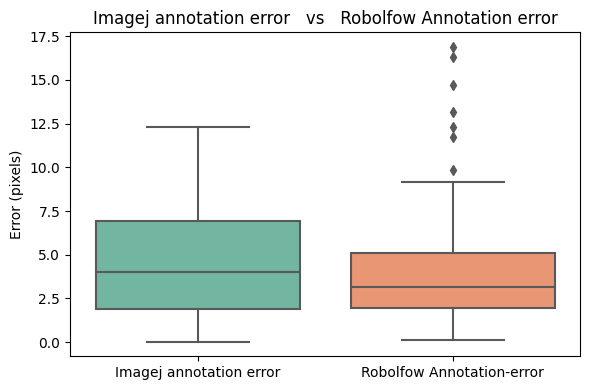


--- Analysis for Pond Type: circle_male ---
Percentage of points where the annotation pixel error is smaller (all pixel error samples): 76.9231%
Number of points where the annotation pixel error is smaller (all pixel error samples): 10
Mean pixel error: 5.63 mm
Mean annotation pixel error: 3.41 mm
----------------------------------------



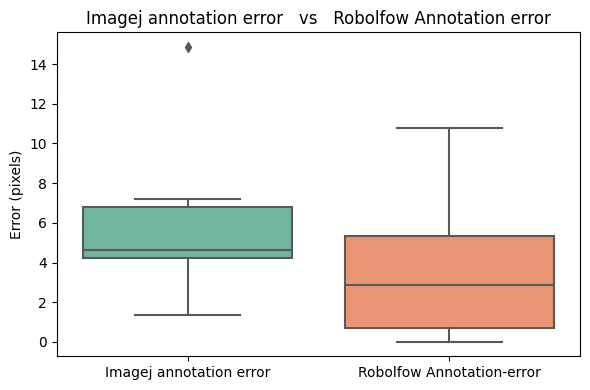


--- Analysis for Pond Type: square ---
Percentage of points where the annotation pixel error is smaller (all pixel error samples): 59.3750%
Number of points where the annotation pixel error is smaller (all pixel error samples): 19
Mean pixel error: 6.58 mm
Mean annotation pixel error: 4.91 mm
----------------------------------------



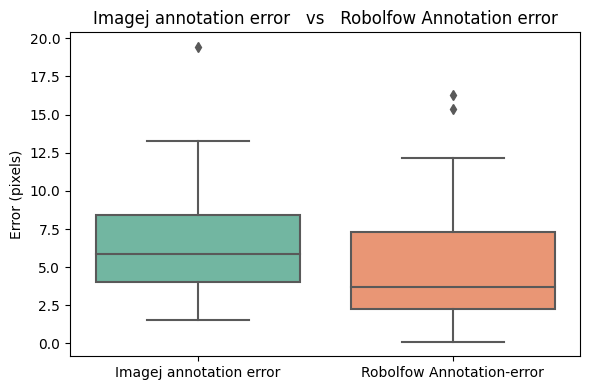

In [6]:
for pond_type in df['Pond_Type'].unique():
    df_pond = df[df['Pond_Type'] == pond_type]
    df_pond['pixel_error_mm'] = abs(abs(df_pond['mean_pixels'] - df_pond['pred_Distance_pixels']) * (1/df_pond['mean_scale']) * 10)
    df_pond['scale_error_mm'] = abs(df_pond['mean_pixels'] * (1/df_pond['mean_scale'] - 1/df_pond['pred_scale']) * 10)
    
    df_pond['annotation_pixel_error'] = abs(df_pond['pred_Distance_pixels'] - df_pond['Length_ground_truth_annotation_pixels'])
    df_pond['annotation_pixel_error_mm'] = abs(df_pond['annotation_pixel_error'] * (1/df_pond['mean_scale']) * 10)
    df_pond['annotation_pixel_error_smaller'] = df_pond['annotation_pixel_error_mm'] < abs(df_pond['pixel_error_mm'])
    
    # Print beautifully formatted output
    print(f"\n--- Analysis for Pond Type: {pond_type} ---")
    print(f"Percentage of points where the annotation pixel error is smaller (all pixel error samples): {df_pond['annotation_pixel_error_smaller'].mean()*100:.4f}%")
    print(f"Number of points where the annotation pixel error is smaller (all pixel error samples): {df_pond['annotation_pixel_error_smaller'].sum()}")
    print(f"Mean pixel error: {df_pond['pixel_error_mm'].mean():.2f} mm")
    print(f"Mean annotation pixel error: {df_pond['annotation_pixel_error_mm'].mean():.2f} mm")
    print("----------------------------------------\n")


    df_long = (df_pond[['pixel_error_mm', 'annotation_pixel_error_mm']].rename(columns={'pixel_error_mm': 'Imagej annotation error', 'annotation_pixel_error_mm': 'Robolfow Annotation-error'})
            .melt(var_name='Error_type', value_name='Error_px'))

    # ░░░  Plot  ░░░
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_long, x='Error_type', y='Error_px', palette='Set2')
    plt.ylabel('Error (pixels)')
    plt.xlabel('')
    plt.title('Imagej annotation error   vs   Robolfow Annotation error')
    plt.tight_layout()
    plt.show()
    

In [7]:
for pond_type in df['Pond_Type'].unique():
        print(f"Mean length for {pond_type}: {df[df['Pond_Type'] == pond_type]['mean_length'].mean()}")
        print(f"Std length for {pond_type}: {df[df['Pond_Type'] == pond_type]['std_length'].mean()}")
        print(f"Number of prawns in {pond_type}: {len(df[df['Pond_Type'] == pond_type])}")
        df_pond = df[df['Pond_Type'] == pond_type]

        min_val = min(df_pond['mean_length'].min(), df_pond['Length_fov(mm)'].min())
        max_val = max(df_pond['mean_length'].max(), df_pond['Length_fov(mm)'].max())
        x = np.linspace(min_val, max_val, 100)

        median_mad = df_pond['std_length'].mean()

        # Create scatter plot
        scatter = go.Scatter(
            x=df_pond['mean_length'],
            y=df_pond['Length_fov(mm)'],
            mode='markers',
            name='Measurements',
            text=df_pond.apply(lambda row: f"Image: {row['Label']}<br>Prawn ID: {row['PrawnID']}", axis=1),
            hoverinfo='text+x+y',
            marker=dict(
                color='#ff7f0e',
                opacity=0.7
            )
        )

       

        # Create diagonal lines
        diag = go.Scatter(x=x, y=x, mode='lines', name='Perfect match (y=x)', 
                        line=dict(color='black', dash='dash'))
        upper = go.Scatter(x=x, y=x + median_mad, mode='lines', 
                        name=f'mean + Std (variability) ({median_mad:.2f} mm)',
                        line=dict(color='#2c7fb8', dash='dash'))
        lower = go.Scatter(x=x, y=x - median_mad, mode='lines',
                        name=f'mean - Std (variability) ({median_mad:.2f} mm)', 
                        line=dict(color='#2c7fb8', dash='dash'))

        # Calculate percentage within bounds for this pond type
        within_bounds = ((df_pond['Length_fov(mm)'] <= df_pond['mean_length'] + median_mad) & 
                        (df_pond['Length_fov(mm)'] >= df_pond['mean_length'] - median_mad)).mean() * 100

        # Create layout
        layout = go.Layout(
            title=f'Model Measurements vs mean Values with Std (variability) Boundaries - {pond_type}',
            xaxis_title='mean of manual measurements (mm)',
            yaxis_title='Model Measurements  (mm)',
            showlegend=True,
            width=800,
            height=800
        )

        # Create figure and add traces
        fig = go.Figure(data=[scatter, diag, upper, lower], layout=layout)

        # Update layout for equal aspect ratio
        fig.update_layout(
            yaxis=dict(
                scaleanchor="x",
                scaleratio=1
            )
        )
        fig.show()

Mean length for circle_female: 34.71894385964913
Std length for circle_female: 3.1592484412607984
Number of prawns in circle_female: 95


Mean length for circle_male: 25.085435897435897
Std length for circle_male: 3.0509964160822687
Number of prawns in circle_male: 13


Mean length for square: 36.659708333333334
Std length for square: 3.212660797471069
Number of prawns in square: 32


In [10]:
for pond_type in df['Pond_Type'].unique():
    #histogram of meAN absolute error
    df_pond = df[df['Pond_Type'] == pond_type]
    df_pond['mean_absolute_error'] =abs(df_pond['mean_length'] - df_pond['Length_fov(mm)'])
    #histogram of mean absolute error    
    df_pond['mean relative error'] = df_pond['mean_absolute_error'] / df_pond['mean_length']*100
    #histogram of mean absolute error
    fig = px.histogram(df_pond, x='mean_absolute_error', nbins=100, title=f'Histogram of mean absolute error for {pond_type}')
    fig.show()
    #histogram of mean relative error
    fig = px.histogram(df_pond, x='mean relative error', nbins=100, title=f'Histogram of mean relative error for {pond_type}')
    fig.show()